In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error,f1_score,precision_score
import plotly.graph_objects as go
from sklearn import svm
import plotly.express as px

In [61]:
covid_raw_data = pd.read_csv("full_covid_data.csv")

In [62]:
clean_data = covid_raw_data.iloc[0:440,0:10]

In [81]:
clean_data

,Confirmed Cases,Confirmed Deaths,Maximum,Minimum,Average,City,Lat,Long,Population
Date,,,,,,,,,
2/1/20,0,0,75,31,53.0,1,30.334320,-97.785356,1273954
2/2/20,0,0,77,31,54.0,1,30.334320,-97.785356,1273955
2/3/20,0,0,73,54,63.5,1,30.334320,-97.785356,1273956
2/4/20,0,0,79,47,63.0,1,30.334320,-97.785356,1273957
2/5/20,0,0,47,34,40.5,1,30.334320,-97.785356,1273958
...,...,...,...,...,...,...,...,...,...
5/16/20,61212,2814,67,50,58.5,4,41.841448,-87.816588,5150338
5/17/20,62218,2839,68,53,60.5,4,41.841448,-87.816588,5150339
5/18/20,63690,2889,64,53,58.5,4,41.841448,-87.816588,5150340


In [63]:
clean_data.set_index('Date',inplace=True)

In [83]:
X = clean_data.drop(["Confirmed Cases"],axis=1)
y = clean_data["Confirmed Cases"]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [85]:
reg = linear_model.Lasso(alpha=0.1)

In [86]:
reg

Lasso(alpha=0.1)

In [87]:
reg.fit(X_train,y_train)

/Users/davidfesenmaier/.local/share/virtualenvs/project_3-paKtD1_P/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2311479457.195279, tolerance: 91646068.075599
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [88]:
y_predict = reg.predict(X_test)

In [89]:
reg.score(X_test,y_test)

0.9830784711459404

In [90]:
mean_squared_error(y_test,y_predict, squared=False)

5331.405297746774

In [91]:
y_test_mean = y_test.mean()

In [73]:
y_test_mean

16114.818181818182

In [74]:
predict_df = pd.DataFrame({
    "y_test":y_test,
    "y_predict":y_predict})

In [75]:
sorted_predict_df=predict_df.sort_index()

In [78]:
sorted_predict_df

,y_test,y_predict
Date,,
2/18/20,0,-467.880260
2/2/20,0,-3491.545984
2/20/20,0,-805.967995
2/23/20,2,10139.007101
2/24/20,0,2645.714077
2/27/20,2,4637.550101
2/28/20,0,693.787882
2/29/20,0,-739.347876
2/9/20,0,1700.976162


KeyError: 'index'

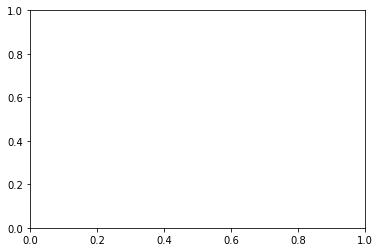

In [80]:
ax = sorted_predict_df.reset_index().plot(kind='scatter', x='index', y='y_predict',color='DarkRed', label='y_predict')
sorted_predict_df.reset_index().plot(kind='scatter', x='index', y='y_test', color='DarkGreen', label='y_test', ax=ax)